In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = './data/train_images_split/train'
val_path = './data/train_images_split/val'
test_path = './data/test_images'

img_size = 224

In [3]:
# X_train = []
# x = 0
# for folder in os.listdir(train_path):
    
#     sub_path = train_path + '/' + folder
    
#     for img in os.listdir(sub_path):
#         image_path = sub_path + '/' + img
#         img_arr = cv2.imread(image_path)
#         img_arr = cv2.resize(img_arr, (img_size, img_size))
#         X_train.append(img_arr)
#         x += 1
#         print(x, end='\r')

In [4]:
# X_test = []
# x = 0
# for img in os.listdir(test_path):
    
#     image_path = test_path + '/' + img
#     img_arr = cv2.imread(image_path)
#     img_arr = cv2.resize(img_arr, (img_size, img_size))
#     X_test.append(img_arr)
#     x += 1
#     print(x, end='\r')

In [5]:
# X_val = []
# x = 0
# for folder in os.listdir(val_path):
#     sub_path = val_path + '/' + folder
    
#     for img in os.listdir(sub_path):
#         image_path = sub_path + '/' + img
#         img_arr = cv2.imread(image_path)
#         img_arr = cv2.resize(img_arr, (img_size, img_size))
#         X_val.append(img_arr)
#         x += 1
#         print(x, end = '\r')

In [6]:
def  train_val_generators(train_path, val_path):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
    training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (img_size,img_size),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
    test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (img_size,img_size),
                                            batch_size = 32,
                                            class_mode = 'sparse')
    val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (img_size,img_size),
                                            batch_size = 32,
                                            class_mode = 'sparse')
    return training_set, val_set

In [8]:
# Test your generators
training_set, val_set = train_val_generators(train_path, val_path)

y_train=training_set.classes
y_val=val_set.classes

training_set.class_indices

Found 8323 images belonging to 10 classes.
Found 0 images belonging to 0 classes.
Found 2084 images belonging to 10 classes.


{'bacterial_leaf_blight': 0,
 'bacterial_leaf_streak': 1,
 'bacterial_panicle_blight': 2,
 'blast': 3,
 'brown_spot': 4,
 'dead_heart': 5,
 'downy_mildew': 6,
 'hispa': 7,
 'normal': 8,
 'tungro': 9}

In [16]:
eff = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=True,
    weights='imagenet',
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
    include_preprocessing=False
)

In [8]:
# # Make all the layers in the pre-trained model non-trainable
# for layer in eff.layers:
#     layer.trainable = False

In [17]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(eff.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)    
prediction =  tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs=eff.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                           

In [18]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [20]:
# fit the model
history = model.fit(
  training_set,
  validation_data= val_set,
  steps_per_epoch = 100,
  epochs=20,
  validation_steps = 50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/20
100/100 [==============================] - 494s 5s/step - loss: 1.9613 - accuracy: 0.3562 - val_loss: 1.7761 - val_accuracy: 0.4375
Epoch 2/20
100/100 [==============================] - 459s 5s/step - loss: 1.6701 - accuracy: 0.4491 - val_loss: 1.6433 - val_accuracy: 0.4556
Epoch 3/20
100/100 [==============================] - 491s 5s/step - loss: 1.4127 - accuracy: 0.5244 - val_loss: 1.2862 - val_accuracy: 0.5525
Epoch 4/20
100/100 [==============================] - 470s 5s/step - loss: 1.3103 - accuracy: 0.5659 - val_loss: 1.1952 - val_accuracy: 0.5769
Epoch 5/20
100/100 [==============================] - 462s 5s/step - loss: 1.0640 - accuracy: 0.6341 - val_loss: 1.3565 - val_accuracy: 0.5638
Epoch 6/20
100/100 [==============================] - 462s 5s/step - loss: 0.9168 - accuracy: 0.6978 - val_loss: 0.9507 - val_accuracy: 0.7094
Epoch 7/20
100/100 [==============================] - 466s 5s/step - loss: 0.7554 - accuracy: 0.7613 - val_loss: 0.8940 - val_accuracy: 0.7094

Text(0.5, 1.0, 'Training and validation loss')

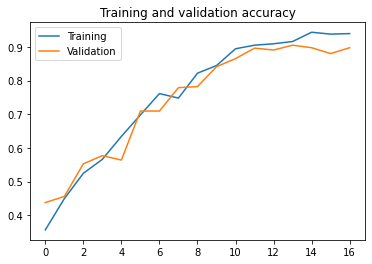

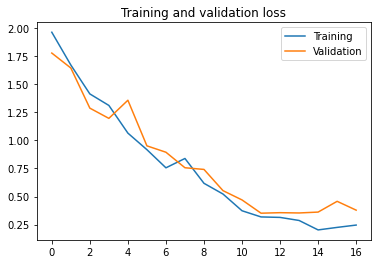

In [21]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [22]:
# save model
saved_model_path = "./effnetV2_model.h5"
model.save(saved_model_path)

In [ ]:
# save sebagai tfjs
!tensorflowjs_converter --input_format=keras {saved_model_path} 

In [ ]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = 'saved_model_tflite'

# YOUR CODE HERE
tf.saved_model.save(model,export_dir=export_dir)

In [ ]:
#@title Select mode of optimization
mode = "Speed" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model =  converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)